# Algorithms

This notebooks runs each of the algorithms separately on the example matrix.

### Import some global dependencies

In [5]:
import __context__

import numpy as np
import matplotlib.pyplot as plt

### Define matrix and parameters

We use a finite difference discretization of the following model problem from density function theory

$$
\mathcal{A} u(\boldsymbol{x}) = - \Delta u(\boldsymbol{x}) + V(\boldsymbol{x}) u(\boldsymbol{x}),
$$

to generate our example matrix $\boldsymbol{A}$, where $V$ consists of periodic Gaussian wells.

In [6]:
from src.matrices import ModES3D
from src.utils import spectral_transformation

# Generate matrix
A = ModES3D(n=1, L=6, h=0.6, dim=3, bc="periodic", var=4, scaling_factor=-4)

a = -5  # lower than smallest eigenvalue
b = 35  # higher than largest eigenvalue

# Set the parameters for the algorithms
n_t = 200
t = np.linspace(a, b, n_t)
sigma = 0.05
m = 2000
n_v = 80

### Do spectral transformations

<div class="alert alert-block alert-warning">
<b>Warning:</b> The algorithms will only work for matrices which have eigenvalues within [-1, 1]. Therefore, we need to apply a spectral transformation to the matrix first.
</div>

In [7]:
A_transformed = spectral_transformation(A, a, b)
t_transformed = spectral_transformation(t, a, b)
scaling_factor = (2 / (b - a))
sigma_transformed = sigma * scaling_factor

### Delta-Gauss-Chebyshev algorithm

We directly estimate the trace using the Hutchinson's trace estimator with a standard Gaussian random matrix $\boldsymbol{\Psi} \in \mathbb{R}^{n \times n_{\Psi}}$ to obtain

$$
\phi_{\sigma}(t) \approx \widetilde \phi_{\sigma}^{(m)}(t) = \frac{1}{n_{\Psi}} \sum_{l=0}^{m} \mu_l(t) \mathrm{Tr}(\boldsymbol{\Psi}^{\top} T_l(\boldsymbol{A}) \boldsymbol{\Psi}).
$$

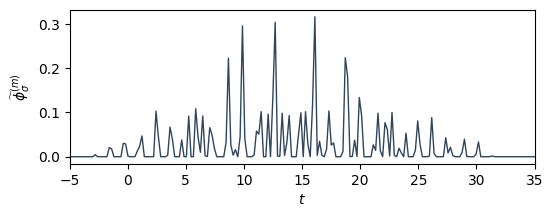

In [8]:
from src.algorithms import DGC
from src.kernel import gaussian_kernel

spectral_density_transformed = DGC(A_transformed, t_transformed, m, sigma_transformed, n_v, kernel=gaussian_kernel)
spectral_density = scaling_factor * spectral_density_transformed

plt.figure(figsize=(6, 2))
plt.xlim([a, b])
plt.ylabel(r"$\widetilde{\phi}_{\sigma}^{(m)}$")
plt.xlabel(r"$t$")
plt.plot(t, spectral_density, linewidth=1, color="#2f455c")
plt.show()

### Nyström-Chebyshev algorithm

We compute the Nyström approximation with a standard Gaussian sketching matrix $\boldsymbol{\Omega} \in \mathbb{R}^{n \times n_{\Omega}}$

$$
g_{\sigma}(t\boldsymbol{I}- \boldsymbol{A}) \approx \widehat g_{\sigma}^{(m)}(t\boldsymbol{I}- \boldsymbol{A}) =
(g_{\sigma}^{(m)}(t\boldsymbol{I}- \boldsymbol{A}) \boldsymbol{\Omega})(\boldsymbol{\Omega}^{\top} g_{\sigma}^{(m)}(t\boldsymbol{I}- \boldsymbol{A}) \boldsymbol{\Omega})(g_{\sigma}^{(m)}(t\boldsymbol{I}- \boldsymbol{A}) \boldsymbol{\Omega})^{\top}
$$

and compute its trace

$$
\phi_{\sigma}(t) \approx \widehat \phi_{\sigma}^{(m)}(t) = \mathrm{Tr}(\widehat{g}_{\sigma}^{(m)}(t\boldsymbol{I}- \boldsymbol{A})).
$$

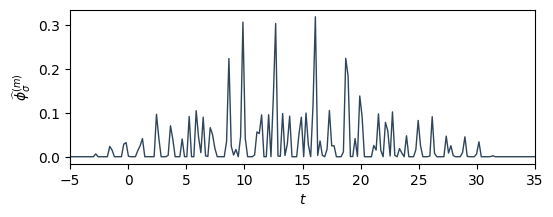

In [9]:
from src.algorithms import NC
from src.kernel import gaussian_kernel

spectral_density_transformed = NC(A_transformed, t_transformed, m, sigma_transformed, n_v, kernel=gaussian_kernel)
spectral_density = scaling_factor * spectral_density_transformed

plt.figure(figsize=(6, 2))
plt.xlim([a, b])
plt.ylabel(r"$\widehat{\phi}_{\sigma}^{(m)}$")
plt.xlabel(r"$t$")
plt.plot(t, spectral_density, linewidth=1, color="#2f455c")
plt.show()

### Nyström-Chebyshev++ algorithm

We compute the Nyström approximation and apply the Hutchinson's to the residual of the approximation to get the trace 

$$
\phi_{\sigma}(t) \approx \breve \phi_{\sigma}^{(m)}(t) = \mathrm{Tr}(\widehat g_{\sigma}^{(m)}(t\boldsymbol{I} - \boldsymbol{A})) + \frac{1}{n_{\Psi}} \mathrm{Tr}(\boldsymbol{\Psi}^{\top} (g_{\sigma}^{(m)}(t\boldsymbol{I}- \boldsymbol{A}) - \widehat g_{\sigma}^{(m)}(t\boldsymbol{I} - \boldsymbol{A})) \boldsymbol{\Psi}).
$$

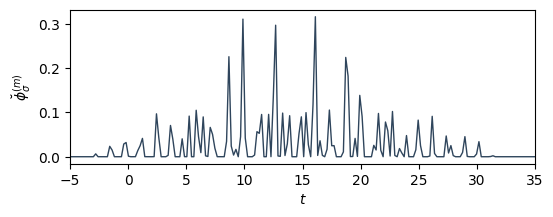

In [10]:
from src.algorithms import NCPP
from src.kernel import gaussian_kernel

spectral_density_transformed = NCPP(A_transformed, t_transformed, m, sigma_transformed, n_v, kernel=gaussian_kernel)
spectral_density = scaling_factor * spectral_density_transformed

plt.figure(figsize=(6, 2))
plt.xlim([a, b])
plt.ylabel(r"$\breve{\phi}_{\sigma}^{(m)}$")
plt.xlabel(r"$t$")
plt.plot(t, spectral_density, linewidth=1, color="#2f455c")
plt.show()